In [5]:
from topicnet.cooking_machine import Dataset


dataset = Dataset('../wikiextractor/good_ruwiki_vw.txt', batch_vectorizer_path="./ruwiki_batches")


In [32]:
from topicnet.cooking_machine.dataset import get_modality_vw
import pandas as pd

data_categories = dataset._data.vw_text.apply(lambda s: get_modality_vw(s, "@categories"))

In [33]:

data = data_categories.apply(lambda x: [cat[:-2] for cat in x.split()])
data_categories = pd.DataFrame(data=data.values, index=data.index.rename("title"), columns=["categories"])

In [34]:
data_categories

categories
title                                                                                                
Санкт-Петербург                                     [Санкт-Петербург, Всемирное_наследие_в_России,...
Дворцовая_площадь                                   [Карл_Росси, Эрмитаж, Художественные_музеи_и_г...
Греко-персидские_войны                              [Греко-персидские_войны, Войны_Древней_Греции,...
Тихий_океан                                                                             [Тихий_океан]
Атлантический_океан                                                             [Атлантический_океан]
Нева                                                [Нева, Реки,_впадающие_в_Финский_залив, Реки_Л...
Тонкослойная_хроматография                                                            [Хроматография]
Атомно-абсорбционная_спектрометрия                               [Аналитическая_химия, Спектроскопия]
Протеомика                                                        [Биоинформатика, Протеомика, Белки]
Вирус_иммунодефицита_человека                                            [Retroviridae, ВИЧ-инфекция]
Эпос_о_Гильгамеше                                   [Сказания_о_Гильгамеше, Эпические_произведения...
Русский_язык                                           [Русский_язык, Языки_России, Языки_Белоруссии]
Индуизм                                               [Индуизм, Религия_в_Азии, Индоиранские_религии]
Спирты                                                                                       [Спирты]
Кикимора                                            [Персонажи_русской_мифологии, Мифические_сущес...
Леший                                               [Духи_леса, Духи_места_у_славян, Нечистая_сила...
Воронеж                                             [Воронеж, Города,_основанные_в_XVI_веке, Город...
Солнце                                                 [Термоядерные_реакции, Солнце, Жёлтые_карлики]
Венера                                              [Венера, Небесные_тела,_посещённые_спускаемыми...
Юпитер                                              [Юпитер, Небесные_тела,_посещённые_спускаемыми...
NTP                                                 [Протоколы_прикладного_уровня, Интернет-проток...
Чеченская_письменность                              [Кириллические_алфавиты, Алфавиты_на_основе_ла...
Нижний_Новгород                                     [Нижний_Новгород, Населённые_пункты_городского...
Иванов,_Вячеслав_Иванович                           [Выпускники_1-й_Московской_гимназии, Писатели_...
Лейбниц,_Готфрид_Вильгельм                          [Члены_Прусской_академии_наук, Члены_Лондонско...
Гагарин,_Юрий_Алексеевич                            [Юрий_Гагарин, Персоналии_Гагарин, Погибшие_в_...
Финский_залив                                       [Финский_залив, Заливы_Эстонии, Заливы_Ленингр...
Индонезия                                                                                 [Индонезия]
Ботсвана                                                                                   [Ботсвана]
Общая_теория_относительности                        [Теории_Альберта_Эйнштейна, Общая_теория_относ...
...                                                                                               ...
Административно-территориальное_деление_Башкурд...  [Административно-территориальное_деление_Башко...
Тёмный_американский_стриж                           [Cypseloides, Животные,_описанные_в_1848_году,...
Убийство_Марты_дель_Кастильо                        [Уголовные_дела_без_тела, Убийства_в_Испании, ...
Праздничное_шествие_с_песней._Коляда                [Художники-примитивисты, Художники_наивного_ис...
Манойлов,_Владимир_Евстафьевич                      [Электротехники_СССР, Выпускники_Санкт-Петербу...
Невилл,_Джон,_3-й_барон_Невилл_из_Рэби              [Невиллы, Бароны_Невилл_из_Рэби, Кавалеры_орде...
Чаннер,_Джордж_Николас                              [Генералы_Британской_Индийской_армии, Участник...
Сиффлит,_Ле

In [85]:

import numpy as np

THRESHOLD = 0

def randomly_select(data_orig, point_a, should_intersect):
    attempts_left = 100
    while attempts_left > 0:
        rnd_idx_b = np.random.choice(data_orig.shape[0])
        point_b = data_orig.iloc[rnd_idx_b]
        intersection = set(point_b.categories) & set(point_a.categories)
        is_big = (len(intersection) > THRESHOLD)
        if should_intersect == is_big:
            # if is_big:
            #    print(point_a.title, point_b.title, intersection)
            return point_b.title, rnd_idx_b, intersection
        attempts_left -= 1
    return None, None, None

def generate_triplet(data_orig):

    rnd_idx_a = np.random.choice(data_orig.shape[0])
    point_a = data_orig.iloc[rnd_idx_a]
    point_b, rnd_idx_b, intersection = randomly_select(data_orig, point_a, should_intersect=True)
    point_c, rnd_idx_c, empty_intersection = randomly_select(data_orig, point_a, should_intersect=False)
    # return [point_a, point_b, point_c]
    return [point_a.title, point_b, point_c, intersection]
    # return [rnd_idx_a, rnd_idx_b, rnd_idx_c]

    
    

In [91]:
from tqdm import tqdm

triplets = []

for i in tqdm(range(10000)):
    a, b, c, explanation = generate_triplet(data_categories.reset_index())
    if b is not None and c is not None:
        triplets.append( (a, b, c, explanation) )

len(triplets)

100%|██████████| 10000/10000 [01:57<00:00, 85.28it/s]


2094

In [93]:
import pickle

with open("triplets_ruwiki_good.p", "wb") as f:
    pickle.dump(triplets, f)


In [96]:
dataset.get_possible_modalities()

{'@categories', '@lemmatized', '@ngramms'}

## Scoring model by ranking quality

In [111]:
from topicnet.cooking_machine.models import BaseScore as BaseTopicNetScore, TopicModel


class ValidationRankingQuality(BaseTopicNetScore):
    def __init__(self, validation_dataset, triplets):
        super().__init__()

        self.validation_dataset = validation_dataset
        self.triplets = triplets

    def call(self, model: TopicModel):
        theta = model.get_theta(dataset=self.validation_dataset)
        
        correct_rankings = 0

        for (a, b, c, _) in self.triplets:
            # L1 distance, just for example
            similar_dist = sum(abs(theta[a] - theta[b]))
            diffrnt_dist = sum(abs(theta[a] - theta[c]))

            correct_rankings += (similar_dist < diffrnt_dist)

        return correct_rankings / len(self.triplets)

        

In [112]:
import artm

artm_model = artm.ARTM(
    num_topics=20, 
    dictionary=dataset.get_dictionary(),
    class_ids={'@lemmatized': 1, '@ngramms': 50},  # absolute values, just for example
    theta_columns_naming="title"
)



In [113]:
tm = TopicModel(artm_model, custom_scores={"ranking": ValidationRankingQuality(dataset, triplets)})

In [116]:
tm._fit(dataset.get_batch_vectorizer(), 10)

0.8911174785100286


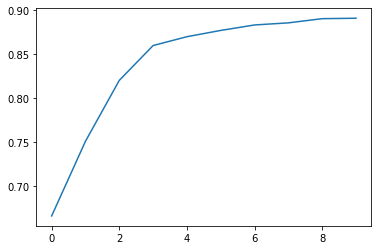

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline

print(tm.scores['ranking'][-1])
plt.plot(tm.scores['ranking'])

In [120]:
theta = artm_model.transform(batch_vectorizer=dataset.get_batch_vectorizer())

In [121]:
for (a, b, c, explanation) in triplets[:100]:
    # L1 distance, just for example
    similar_dist = sum(abs(theta[a] - theta[b])) 
    diffrnt_dist = sum(abs(theta[a] - theta[c]))

    if (similar_dist > diffrnt_dist):
        print(a, b, c)
        print(explanation)


Далматинский_язык Сербские_беженцы_во_время_распада_Югославии Воротынское_княжество
{'История_Хорватии'}
Уорди,_Джеймс Конвей,_Джон_Хортон Великая_красота
{'Выпускники_Кембриджского_университета'}
Ардзинба,_Владислав_Григорьевич Шиман,_Пауль Беспощадная_толерантность
{'Политики_XX_века'}
Большеносая_акула Лисьи_акулы Тхить_Куанг_Дык
{'Рыбы_Атлантического_океана', 'Рыбы_Индийского_океана', 'Рыбы_Тихого_океана'}
Форт_Аламо_(фильм,_1960) Спи,_моя_любовь Государственные_деятели_Первой_мировой_войны
{'Фильмы_на_английском_языке'}
Лютостанский,_Ипполит_Иосифович Филипп_II_(митрополит_Московский) Тит_Квинкций_Фламинин
{'Извергнутые_из_сана'}
Махмуд-паша Марк_Порций_Катон_Салониан_Младший Сверх-Борджиа_в_Кремле
{'Персоналии_по_алфавиту'}
Чернов,_Григорий_Иванович Каспаров,_Гарри_Кимович Корабли_измерительного_комплекса_проекта_1914
{'Члены_КПСС'}
Махмуд-паша Александрян,_Рафаэль_Арамович Сикст_из_Оттерсдорфа
{'Персоналии_по_алфавиту'}
Операция_«Юго-Восточная_Хорватия» Штурм_Мервильской_батареи